# Get the nearest climate for proxies

In this tutorial, we introduce how to get the nearest climate for proxies with `p2k`.

In [1]:
%load_ext autoreload
%autoreload 2

import p2k
import pandas as pd
import numpy as np
import os

import warnings
warnings.filterwarnings('ignore')

## Load the PAGES2k network stored in a pandas `DataFrame`

In [2]:
df = pd.read_pickle('./data/pages2k_dataset.pkl')
df.columns

Index(['paleoData_pages2kID', 'dataSetName', 'archiveType', 'geo_meanElev',
       'geo_meanLat', 'geo_meanLon', 'year', 'yearUnits',
       'paleoData_variableName', 'paleoData_units', 'paleoData_values',
       'paleoData_proxy'],
      dtype='object')

## Create a `ProxyDatabase` and load from the pandas `DataFrame`

In [3]:
pdb = p2k.ProxyDatabase().from_df(df)

## Load climate data to `ClimateDataset`

In [4]:
dirpath = '/Volumes/ExtraDrive/Data/GCM_sims/icesm_last_millennium_historical'

ds_tas = p2k.ClimateDataset().load_nc(os.path.join(dirpath, 'tas_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))
ds_pr = p2k.ClimateDataset().load_nc(os.path.join(dirpath, 'pr_sfc_Amon_iCESM_past1000historical_085001-200512.nc'))

## Get the nearest climate from a `ClimateField` or a `ClimateDataset` for a `ProxyRecord`

In [5]:
fd = ds_tas.fields['tas']

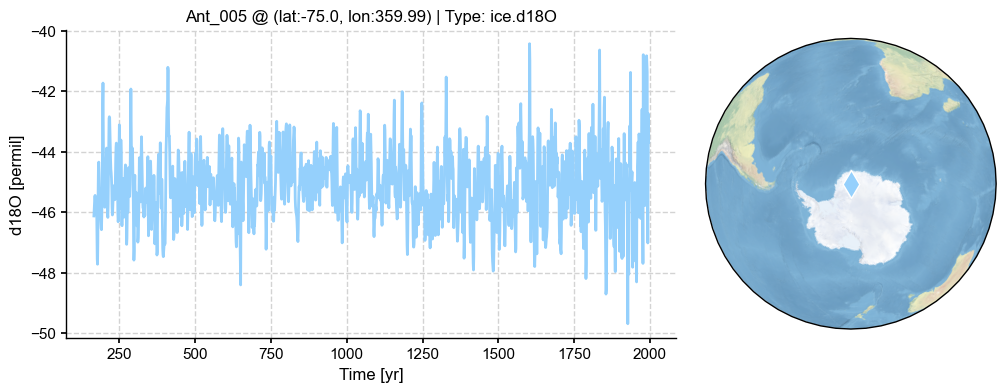

In [6]:
pobj = pdb.records['Ant_005']
fig, ax = pobj.plot()

In [8]:
pobj.get_clim(fd)

ProxyRecord.clim["tas"] created.


In [9]:
pobj.get_clim(ds_pr)

ProxyRecord.clim["pr"] created.


In [12]:
pobj.clim['tas'].da

<xarray.DataArray 'tas' (time: 13872)>
array([248.87474, 242.98064, 234.44029, ..., 233.60123, 243.2134 , 249.26338],
      dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 -74.84
    lon      float32 357.5
Attributes:
    long_name:  Reference height temperature
    units:      K

In [13]:
pobj.clim['pr'].da

<xarray.DataArray 'pr' (time: 13872)>
array([7.413925e-07, 4.369729e-07, 6.698622e-07, ..., 8.378123e-07,
       5.276332e-07, 2.980374e-06], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 -74.84
    lon      float32 357.5
Attributes:
    long_name:  Total mass precip rate of H216O
    units:      kg m-2 s-1

## Get the nearest climate from a `ClimateField` for a `ProxyDatabase`

In [14]:
pdb_TRW = pdb.filter(by='ptype', keys=['tree.TRW'])

In [15]:
pdb_TRW.del_clim()
pdb_TRW.get_clim(ds_tas+ds_pr, tag='model')

Deleting the nearest climate for ProxyRecord: 100%|█| 354/354 [00:01<00:00, 233.
Getting the nearest climate for ProxyRecord: 100%|█| 354/354 [08:04<00:00,  1.37


In [16]:
pdb_TRW.records['NAm_153'].clim['model-tas'].da

<xarray.DataArray 'tas' (time: 13872)>
array([256.63867, 259.30438, 263.68216, ..., 274.59763, 266.72495, 258.0086 ],
      dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 52.11
    lon      float32 242.5
Attributes:
    long_name:  Reference height temperature
    units:      K

In [17]:
pdb_TRW.records['NAm_153'].clim['model-pr'].da

<xarray.DataArray 'pr' (time: 13872)>
array([1.225193e-05, 2.323924e-05, 1.736925e-05, ..., 3.076693e-05,
       2.525897e-05, 4.261171e-05], dtype=float32)
Coordinates:
  * time     (time) object 0850-01-17 00:00:00 ... 2005-12-17 00:00:00
    lat      float32 52.11
    lon      float32 242.5
Attributes:
    long_name:  Total mass precip rate of H216O
    units:      kg m-2 s-1

In [19]:
pdb_TRW.records['NAm_153'].clim.keys()

dict_keys(['model-tas', 'model-pr'])

In [20]:
pd.to_pickle(pdb_TRW, './data/pdb_TRW_clim.pkl')